
<p><img align="left" src="https://www.cqf.com/themes/custom/creode/logo.svg" style="vertical-align: top; padding-top: 23px;" width="10%"/>
<img align="right" src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg" style="vertical-align: middle;" width="12%"/>
<font color="#306998"><h1><center>Python Labs</center></h1></font></p>
<p></p><h1><center>Portfolio Optimization and Efficient Frontier</center></h1>
<center><b>Kannan Singaravelu</b></center>
<center>kannan.singaravelu@fitchlearning.com</center>



<h2 id="Modern-Portfolio-Theory">Modern Portfolio Theory<a class="anchor-link" href="#Modern-Portfolio-Theory">¶</a></h2>



<p>Modern portfolio theory also popularly called as <strong><code>Mean-Variance Portofolio Theory</code> (MVP)</strong> is a major breakthrough in finance. It is based on the premises that returns are normally distributed and by looking at mean and variance, we can essentialy describe the distribution of end-of-period wealth.</p>
<p>The basic idea of this theory is to achieve diversification by constructuing portfolio for a minimal portfolio risk or maximal portfolio returns given a certain level of risk. Accordingly, the <strong>Efficient Frontier</strong> is a set of optimal portfolios in the risk-return spectrum and portfolios located under the Efficient Frontier curve are considered sub-optimal.</p>
<p>This means that the portfolios on the frontier offer</p>
<ul>
<li>Highest expected return for a given level of risk</li>
<li>Lowest level of risk for a given level of expected returns</li>
</ul>
<p>In essence, the investors goal should be to select a level of risk that he/she is comfortable with and then find a portfolio that maximizes returns based on the selected risk level.</p>




<h3 id="Import-libraries">Import libraries<a class="anchor-link" href="#Import-libraries">¶</a></h3>


In [2]:

import pandas as pd
#import xlwings as xw


import numpy as np
from numpy import *
from numpy.linalg import multi_dot  

import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams 
rcParams['figure.figsize'] = 16, 8 




<p>We will use the FAANG stocks as before to build our portfolio</p>


In [3]:

# FAANG stocks
symbols = ['AAPL', 'AMZN', 'FB', 'GOOG', 'NFLX' ]
numofasset = len(symbols)
numofportfolio = 5000




<h3 id="Retrive-Data">Retrive Data<a class="anchor-link" href="#Retrive-Data">¶</a></h3>


In [4]:

# Load locally stored data
df = pd.read_csv('faang_stocks_1.csv', index_col=0, parse_dates=True)
# df = pd.read_csv('data/faang_stocks.csv', index_col=0, parse_dates=True)['2013':]

# Check first 5 values 
df.head()



,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2019-05-31,43.034817,1775.069946,177.470001,1103.630005,343.279999
2019-06-03,42.599720,1692.689941,164.149994,1036.229980,336.630005
2019-06-04,44.158184,1729.560059,167.500000,1053.050049,353.399994
2019-06-05,44.871044,1738.500000,168.169998,1042.219971,355.730011
2019-06-06,45.529827,1754.359985,168.330002,1044.339966,357.130005



<h3 id="View-Data-in-Excel">View Data in Excel<a class="anchor-link" href="#View-Data-in-Excel">¶</a></h3>


In [5]:

# View data in Excel
#xw.view(df)




<h3 id="Descriptive-Statistics">Descriptive Statistics<a class="anchor-link" href="#Descriptive-Statistics">¶</a></h3>


In [6]:

summary = df.describe().T
summary



,count,mean,std,min,25%,50%,75%,max
AAPL,273.0,64.621587,12.120349,42.599720,52.626595,64.891792,75.036385,91.173805
AMZN,273.0,1978.945311,269.482130,1676.609985,1785.880005,1878.270020,2042.760010,2764.409912
FB,273.0,195.708645,19.691781,146.009995,183.279999,194.110001,208.100006,242.240005
GOOG,273.0,1277.659359,124.686955,1036.229980,1181.410034,1266.609985,1375.739990,1526.689941
NFLX,273.0,347.137105,53.727651,254.589996,298.989990,339.260010,379.929993,468.040009



<h3 id="Visualize-Data">Visualize Data<a class="anchor-link" href="#Visualize-Data">¶</a></h3>


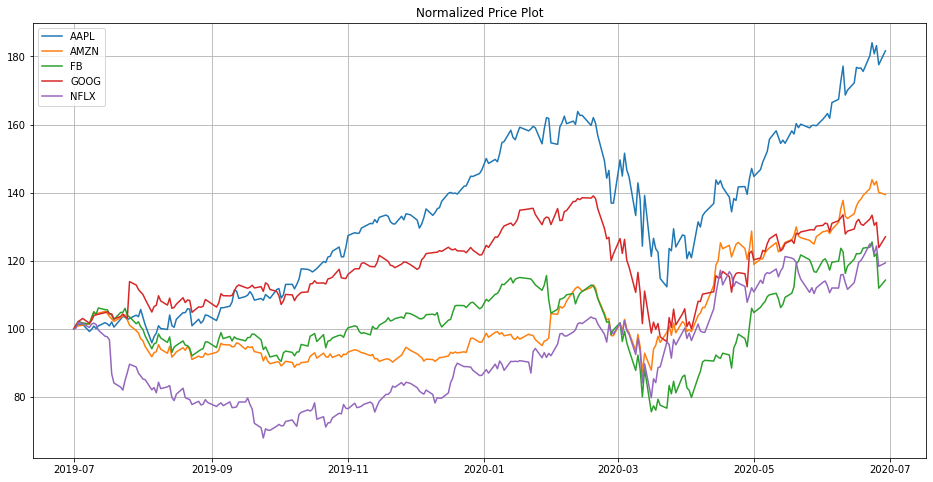

In [7]:

# Visualize the data
fig = plt.figure(figsize=(16,8))
ax = plt.axes()

ax.set_title('Normalized Price Plot')
ax.plot(df[-252:]/df.iloc[-252] * 100)
ax.legend(df.columns, loc='upper left')
ax.grid(True)




<h3 id="Calculate-Returns">Calculate Returns<a class="anchor-link" href="#Calculate-Returns">¶</a></h3>


In [8]:

# Calculate returns 
returns = df.pct_change().fillna(0)
returns.head()



,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2019-05-31,0.000000,0.000000,0.000000,0.000000,0.000000
2019-06-03,-0.010110,-0.046409,-0.075055,-0.061071,-0.019372
2019-06-04,0.036584,0.021782,0.020408,0.016232,0.049817
2019-06-05,0.016143,0.005169,0.004000,-0.010284,0.006593
2019-06-06,0.014682,0.009123,0.000951,0.002034,0.003936



<h4 id="Annualized-Returns">Annualized Returns<a class="anchor-link" href="#Annualized-Returns">¶</a></h4><p>In <strong>MVP</strong>, the average returns play an important role as they are used to approximate the expected returns.</p>


In [9]:

# Calculate annual returns
annual_returns = (returns.mean() * 252)
annual_returns



AAPL    0.759624
AMZN    0.427760
FB      0.281284
GOOG    0.280488
NFLX    0.328163
dtype: float64

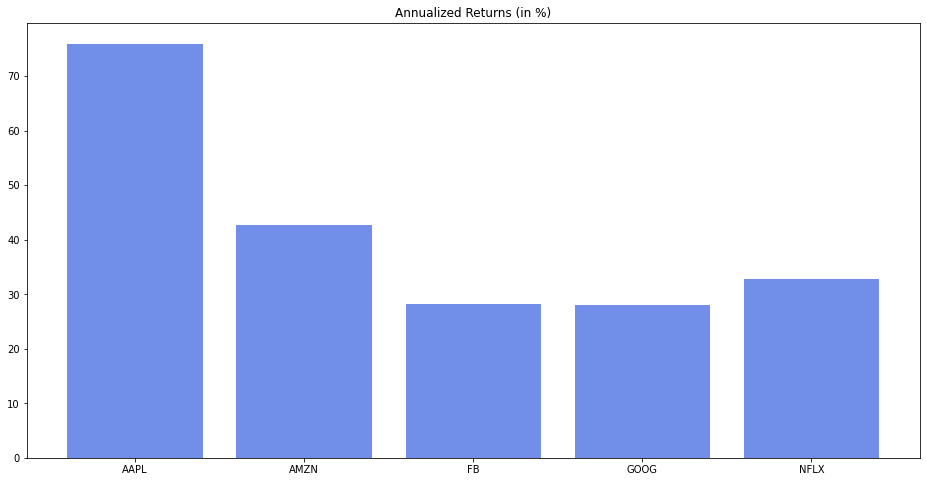

In [10]:

# Visualize the data
fig = plt.figure()
ax =plt.axes()

ax.bar(annual_returns.index, annual_returns*100, color='royalblue', alpha=0.75)
ax.set_title('Annualized Returns (in %)');




<h3 id="Calculate-Volatility">Calculate Volatility<a class="anchor-link" href="#Calculate-Volatility">¶</a></h3>


In [11]:

vols = returns.std()
vols



AAPL    0.024842
AMZN    0.019362
FB      0.025117
GOOG    0.022602
NFLX    0.025751
dtype: float64


<h4 id="Annualized-Volatilities">Annualized Volatilities<a class="anchor-link" href="#Annualized-Volatilities">¶</a></h4>


In [12]:

# Calculate annualized volatilities
annual_vols = vols*sqrt(252)
annual_vols



AAPL    0.394350
AMZN    0.307366
FB      0.398715
GOOG    0.358799
NFLX    0.408783
dtype: float64

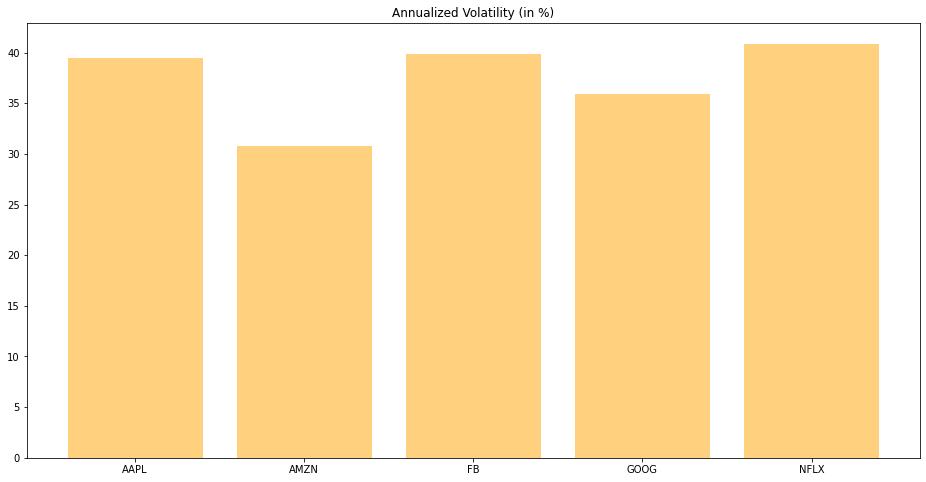

In [13]:

# Visualize the data
fig = plt.figure()
ax = plt.axes()

ax.bar(annual_vols.index, annual_vols*100, color='orange', alpha=0.5)
ax.set_title('Annualized Volatility (in %)');




<h2 id="Portfolio-Statistics">Portfolio Statistics<a class="anchor-link" href="#Portfolio-Statistics">¶</a></h2><p>Consider a portfolio fully invested in risky assets. Let $w$ and $\mu$ be the vector of weights and mean returns of <em>n</em> assets. <br/><br/></p>
$$\ {w=}\left( 
\begin{array}{c}
w_1 \\
w_2 \\
\vdots \\
w_n \\ 
\end{array}%
\right);
\ \mathbf{\mu=}\left( 
\begin{array}{ccc}
\mu_1 \\ 
\mu_2 \\ 
\vdots \\
\mu_n \\ 
\end{array}%
\right)$$<p></p>
<p>where the $\sum_{i=1}^{n}w_i=1$</p>
<p><strong>Expected Portfolio Return</strong> is then the dot product of the expected returns and their weights. <br/><br/></p>
$$\mu_\pi = w^T\cdot\mu$$<p>which is also equivalent to the $\Sigma_{i=1}^{n}w_i\mu_i$</p>
<p><strong>Expected Portfolio Variance</strong> is then the multidot product of weights and the covariance matrix. <br/><br/></p>
$$\sigma^2_\pi = w^T\cdot\Sigma\cdot w $$<p>where, ${\Sigma}$ is the covariance matrix</p>
$${\Sigma=}\left( 
\begin{array}{ccc}
\Sigma_{1,1} &amp; \dots &amp; \Sigma_{1,n} \\ 
\vdots &amp; \ddots &amp; \vdots  \\ 
\Sigma_{n,1} &amp; \dots &amp; \Sigma_{n,n} \\ %
\end{array}%
\right)$$



<h3 id="Equal-Weighted-Portfolio">Equal Weighted Portfolio<a class="anchor-link" href="#Equal-Weighted-Portfolio">¶</a></h3><p>Assume a portoflio composed of all five stocks with equal weighting. We will now calculate the portfolio statistics.</p>


In [14]:
wts = numofasset * [1./numofasset]
wts

[0.2, 0.2, 0.2, 0.2, 0.2]

In [15]:

wts = numofasset * [1./numofasset]
wts = array(wts)[:,newaxis]
wts



array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [16]:

wts.shape



(5, 1)


<h3 id="Portfolio-Return">Portfolio Return<a class="anchor-link" href="#Portfolio-Return">¶</a></h3>


In [17]:

array(returns.mean() * 252)[:,newaxis]      



array([[0.75962428],
       [0.42775968],
       [0.2812837 ],
       [0.28048772],
       [0.32816277]])

In [18]:

array(returns.mean() * 252)[:,newaxis].shape 



(5, 1)

In [19]:

# Portfolio returns
wts.T @ array(returns.mean() * 252)[:,newaxis]        



array([[0.41546363]])


<h3 id="Portfolio-Volatility">Portfolio Volatility<a class="anchor-link" href="#Portfolio-Volatility">¶</a></h3>


In [20]:

# Covariance matrix
returns.cov() * 252



,AAPL,AMZN,FB,GOOG,NFLX
AAPL,0.155512,0.083239,0.121880,0.115626,0.088288
AMZN,0.083239,0.094474,0.082994,0.074965,0.081504
FB,0.121880,0.082994,0.158974,0.116053,0.090101
GOOG,0.115626,0.074965,0.116053,0.128737,0.082422
NFLX,0.088288,0.081504,0.090101,0.082422,0.167104


In [21]:

# Portfolio variance
multi_dot([wts.T,returns.cov()*252,wts])



array([[0.1031578]])

In [22]:

# Portfolio volatility
sqrt(multi_dot([wts.T,returns.cov()*252,wts]))



array([[0.32118188]])


<h3 id="Portfolio-statistics">Portfolio statistics<a class="anchor-link" href="#Portfolio-statistics">¶</a></h3><p>Let's subsume key statistics into a function which can be used for optimization exercise.</p>


In [23]:

def portfolio_stats(weights):
    
    weights = array(weights)[:,newaxis]
    port_rets = weights.T @ array(returns.mean() * 252)[:,newaxis]    
    port_vols = sqrt(multi_dot([weights.T, returns.cov() * 252, weights])) 
    
    return np.array([port_rets, port_vols, port_rets/port_vols]).flatten()



In [24]:

# import pyfolio as pf
# ewp = returns@wts
# ewp.columns =['ret']
# ewp.cumsum().iloc[-1]
# pf.create_simple_tear_sheet(ewp['ret'])
# plt.plot((1+ewp['ret']).cumprod())




<h2 id="Portfolio-Simulation">Portfolio Simulation<a class="anchor-link" href="#Portfolio-Simulation">¶</a></h2><p>Now, we will implement a Monte Carlo simulation to generate random portfolio weights on a larger scale and calculate the expected portfolio return, variance and sharpe ratio for every simulated allocation. We will then identify the portfolio with a highest return for per unit of risk.</p>


In [25]:

w = random.random(numofasset)[:, newaxis]
w



array([[0.20324662],
       [0.59652877],
       [0.07971382],
       [0.08080593],
       [0.46167839]])

In [26]:

w /= sum(w)
w



array([[0.14293278],
       [0.41950765],
       [0.05605858],
       [0.05682661],
       [0.32467439]])

In [27]:

w.shape, sum(w)



((5, 1), 1.0)

In [28]:

w.flatten()



array([0.14293278, 0.41950765, 0.05605858, 0.05682661, 0.32467439])

In [29]:

# Initialize the lists
rets = []; vols = []; wts = []

# Simulate 5,000 portfolios
for i in range (5000):
    
    # Generate random weights
    weights = random.random(numofasset)[:, newaxis]
    
    # Set weights such that sum of weights equals 1
    weights /= sum(weights)
    
    # Portfolio statistics
    rets.append(weights.T @ array(returns.mean() * 252)[:, newaxis])        
    vols.append(sqrt(multi_dot([weights.T, returns.cov()*252, weights])))
    wts.append(weights.flatten())

# Record values     
port_rets = array(rets).flatten()
port_vols = array(vols).flatten()
port_wts = array(wts)



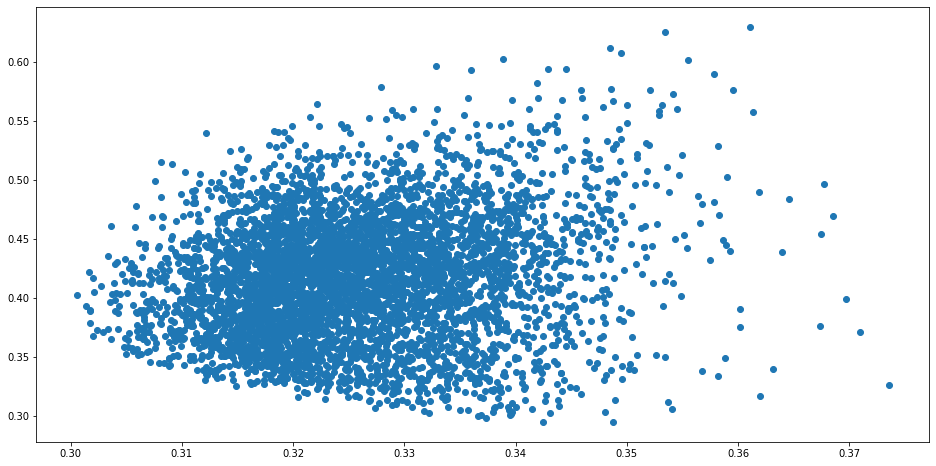

In [55]:
plt.scatter(port_vols,port_rets)

In [30]:

port_rets



array([0.53134674, 0.39082768, 0.41100463, ..., 0.37830033, 0.36577588,
       0.40942434])

In [31]:

port_vols



array([0.3517179 , 0.33624796, 0.3112624 , ..., 0.32589265, 0.33244819,
       0.3179569 ])

In [32]:

port_wts



array([[0.50024979, 0.0412889 , 0.27212964, 0.08410312, 0.10222856],
       [0.19066879, 0.1228845 , 0.18408962, 0.48684379, 0.0155133 ],
       [0.14950011, 0.32609631, 0.1252494 , 0.17343017, 0.22572401],
       ...,
       [0.11758975, 0.27588837, 0.33461272, 0.25986727, 0.0120419 ],
       [0.12591656, 0.03446604, 0.0528288 , 0.37065913, 0.41612946],
       [0.17870467, 0.26552308, 0.15521723, 0.31487019, 0.08568484]])

In [33]:

port_rets.shape, port_vols.shape, port_wts.shape



((5000,), (5000,), (5000, 5))

In [34]:

# Create a dataframe for analysis
mc_df = pd.DataFrame({'returns': port_rets,
                      'volatility': port_vols,
                      'sharpe_ratio': port_rets/port_vols,
                      'weights': list(port_wts)})
mc_df.head()



,returns,volatility,sharpe_ratio,weights
0,0.531347,0.351718,1.510718,"[0.5002497874660649, 0.04128889719548412, 0.27..."
1,0.390828,0.336248,1.162320,"[0.19066879429479663, 0.12288449672536829, 0.1..."
2,0.411005,0.311262,1.320444,"[0.14950010793375598, 0.3260963099182293, 0.12..."
3,0.521801,0.325812,1.601538,"[0.4206688892999693, 0.2290527814085883, 0.036..."
4,0.358670,0.316239,1.134173,"[0.0611507981407378, 0.23530845539132125, 0.15..."



<h3 id="Summary-Statistics">Summary Statistics<a class="anchor-link" href="#Summary-Statistics">¶</a></h3>


In [35]:

# Summary Statistics
mc_df.describe().T



,count,mean,std,min,25%,50%,75%,max
returns,5000.0,0.415932,0.051649,0.295068,0.377734,0.415669,0.449677,0.629447
volatility,5000.0,0.325968,0.010351,0.300571,0.318482,0.324845,0.332878,0.373543
sharpe_ratio,5000.0,1.276402,0.155237,0.846010,1.167280,1.278418,1.379335,1.790310



<h3 id="Maximum-Sharpe-Ratio-Portfolio">Maximum Sharpe Ratio Portfolio<a class="anchor-link" href="#Maximum-Sharpe-Ratio-Portfolio">¶</a></h3>


In [36]:

# Max sharpe ratio portfolio 
msrp = mc_df.iloc[mc_df['sharpe_ratio'].idxmax()]
msrp



returns                                                  0.595896
volatility                                               0.332845
sharpe_ratio                                              1.79031
weights         [0.5643186990785954, 0.2684341552604557, 0.020...
Name: 175, dtype: object

In [37]:

# Max sharpe ratio portfolio weights
max_sharpe_port_wts = mc_df['weights'][mc_df['sharpe_ratio'].idxmax()]

# Allocation to achieve max sharpe ratio portfolio
dict(zip(symbols,np.around(max_sharpe_port_wts*100,2)))



{'AAPL': 56.43, 'AMZN': 26.84, 'FB': 2.08, 'GOOG': 3.16, 'NFLX': 11.48}


<h3 id="Visulaize-Simulated-Portfolio">Visulaize Simulated Portfolio<a class="anchor-link" href="#Visulaize-Simulated-Portfolio">¶</a></h3>


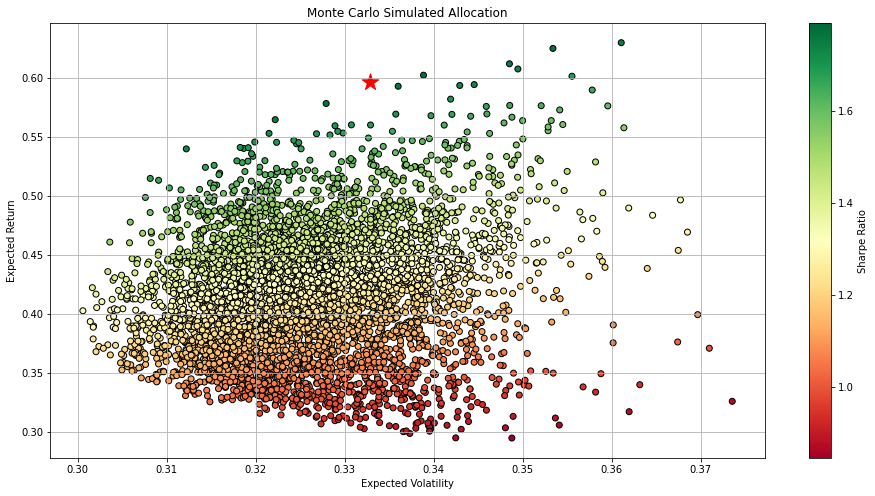

In [38]:

# Visualize the simulated portfolio for risk and return
fig = plt.figure()
ax = plt.axes()

ax.set_title('Monte Carlo Simulated Allocation')

# Simulated portfolios
fig.colorbar(ax.scatter(port_vols, port_rets, c=port_rets / port_vols, 
                        marker='o', cmap='RdYlGn', edgecolors='black'), label='Sharpe Ratio') 

# Maximum sharpe ratio portfolio
ax.scatter(msrp['volatility'], msrp['returns'], c='red', marker='*', s = 300, label='Max Sharpe Ratio')

ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
ax.grid(True)




<h2 id="Efficient-Frontier">Efficient Frontier<a class="anchor-link" href="#Efficient-Frontier">¶</a></h2>



<p>The Efficient Frontier is formed by a set of portfolios offering the highest expected portfolio return for a certain volatility or offering the lowest volatility for a certain level of expected returns.</p>
<p><strong>Return objective</strong>:</p>
$$\underset{w_1,w_2,\dots,w_n}{minimize} \space\space \sigma^2_{p}(w_1,w_2,\dots,w_n)$$<p>subject to,</p>
$$E[R_p] = m$$<p><strong>Risk constraint</strong>:</p>
$$\underset{w_1,w_2,\dots,w_n}{maximize} \space\space E[R_p(w_1,w_2,\dots,w_n)]$$<p>subject to,</p>
$$\sigma^2_{p}(w_1,w_2,\dots,w_n)=v^2$$<p>where, $\sum_{i=1}^{n}w_i=1$ for the above objectives.</p>
<p>We can use numerical optimization to achieve this objective. The goal of optimization is to find the optimal value of the objective function by adjusting the target variables operating withing some boundary conditions and constraints.</p>



<h3 id="Constrained-Optimization">Constrained Optimization<a class="anchor-link" href="#Constrained-Optimization">¶</a></h3><p>Construction of optimal portfolios is a constrained optimization problem where we specify some boundary conditions and constraints. The objective function here is a function returning maximum sharpe ratio, minimum variance (volatility) and the target variables are portfolio weights. We will use the <em><code>minimize</code></em> function from <code>scipy</code> optimization module to achieve our objective.</p>
<blockquote><div class="highlight"><pre><span></span><span class="n">sco</span><span class="o">.</span><span class="n">minimize</span><span class="p">(</span><span class="n">fun</span><span class="p">,</span> <span class="n">x0</span><span class="p">,</span> <span class="n">args</span><span class="o">=</span><span class="p">(),</span> <span class="n">method</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> <span class="n">jac</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> <span class="n">hess</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> <span class="n">hessp</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> 
             <span class="n">bounds</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> <span class="n">constraints</span><span class="o">=</span><span class="p">(),</span> <span class="n">tol</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> <span class="n">callback</span><span class="o">=</span><span class="kc">None</span><span class="p">,</span> <span class="n">options</span><span class="o">=</span><span class="kc">None</span><span class="p">)</span>
</pre></div>
</blockquote>


In [39]:

# Import optimization module from scipy
import scipy.optimize as sco




<h4 id="Maximum-sharpe-ratio-portfolio">Maximum sharpe ratio portfolio<a class="anchor-link" href="#Maximum-sharpe-ratio-portfolio">¶</a></h4>


In [40]:

# Maximizing sharpe ratio
def min_sharpe_ratio(weights):
    return -portfolio_stats(weights)[2]



In [41]:

cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(numofasset))
initial_wts = numofasset*[1./numofasset]



In [42]:

# Optimizing for maximum sharpe ratio
opt_sharpe = sco.minimize(min_sharpe_ratio, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)



In [43]:

opt_sharpe



     fun: -1.9285985873823792
     jac: array([-2.05039978e-05,  2.24575400e-04,  8.47555175e-01,  7.63898462e-01,
        3.10096294e-01])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([9.16238352e-01, 8.37616481e-02, 2.74086309e-16, 0.00000000e+00,
       0.00000000e+00])

In [44]:

# Portfolio weights
list(zip(symbols,np.around(opt_sharpe['x']*100,2)))



[('AAPL', 91.62), ('AMZN', 8.38), ('FB', 0.0), ('GOOG', 0.0), ('NFLX', 0.0)]

In [45]:

# Portfolio stats
stats = ['Returns', 'Volatility', 'Sharpe Ratio']
list(zip(stats,np.around(portfolio_stats(opt_sharpe['x']),4)))



[('Returns', 0.7318), ('Volatility', 0.3795), ('Sharpe Ratio', 1.9286)]


<h4 id="Minumum-variance-portfolio">Minumum variance portfolio<a class="anchor-link" href="#Minumum-variance-portfolio">¶</a></h4>


In [46]:

# Minimize the variance
def min_variance(weights):
    return portfolio_stats(weights)[1]**2



In [47]:

# Optimizing for minimum variance
opt_var = sco.minimize(min_variance, initial_wts, method='SLSQP', bounds=bnds, constraints=cons)



In [48]:

opt_var



     fun: 0.08866953251750283
     jac: array([0.18305808, 0.17737959, 0.18322302, 0.177309  , 0.1770865 ])
 message: 'Optimization terminated successfully'
    nfev: 66
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([1.89099281e-18, 6.76832402e-01, 6.14859346e-18, 2.43547677e-01,
       7.96199206e-02])

In [49]:

# Portfolio weights
list(zip(symbols,np.around(opt_var['x']*100,2)))



[('AAPL', 0.0), ('AMZN', 67.68), ('FB', 0.0), ('GOOG', 24.35), ('NFLX', 7.96)]

In [50]:

# Portfolio stats
list(zip(stats,np.around(portfolio_stats(opt_var['x']),4)))



[('Returns', 0.384), ('Volatility', 0.2978), ('Sharpe Ratio', 1.2894)]


<h4 id="Efficient-Frontier-portfolio">Efficient Frontier portfolio<a class="anchor-link" href="#Efficient-Frontier-portfolio">¶</a></h4><p>For efficient frontier portfolios, we fix a target return and derive for objective function.</p>


In [51]:

# Minimize the volatility
def min_volatility(weights):
    return portfolio_stats(weights)[1]



In [52]:

targetrets = linspace(0.28,0.75,100)
tvols = []

for tr in targetrets:
    
    ef_cons = ({'type': 'eq', 'fun': lambda x: portfolio_stats(x)[0] - tr},
               {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    
    opt_ef = sco.minimize(min_volatility, initial_wts, method='SLSQP', bounds=bnds, constraints=ef_cons)
    
    tvols.append(opt_ef['fun'])

targetvols = array(tvols)



C:\Users\笨笨呆呆\AppData\Local\Temp/ipykernel_14108/1999680545.py:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  fig.colorbar(ax.scatter(targetvols, targetrets, c=targetrets / targetvols,


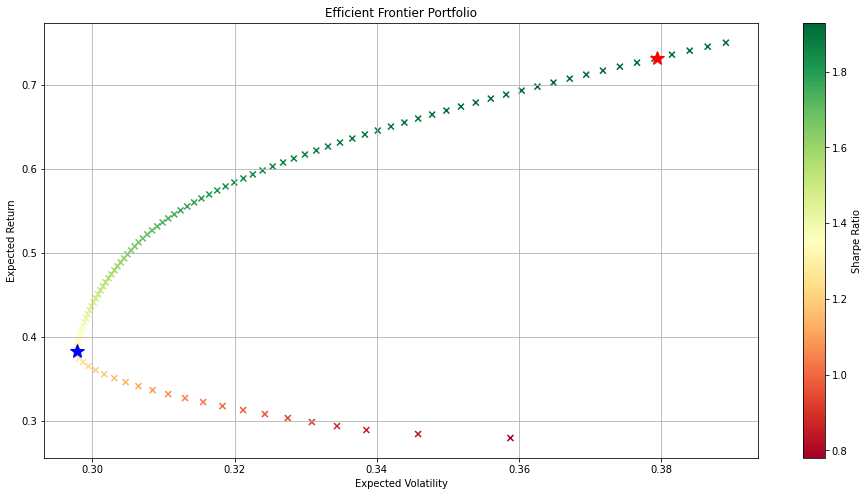

In [53]:

# Visualize the simulated portfolio for risk and return
fig = plt.figure()
ax = plt.axes()

ax.set_title('Efficient Frontier Portfolio')

# Efficient Frontier
fig.colorbar(ax.scatter(targetvols, targetrets, c=targetrets / targetvols, 
                        marker='x', cmap='RdYlGn', edgecolors='black'), label='Sharpe Ratio') 

# Maximum Sharpe Portfolio
ax.plot(portfolio_stats(opt_sharpe['x'])[1], portfolio_stats(opt_sharpe['x'])[0], 'r*', markersize =15.0)

# Minimum Variance Portfolio
ax.plot(portfolio_stats(opt_var['x'])[1], portfolio_stats(opt_var['x'])[0], 'b*', markersize =15.0)

ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
ax.grid(True)




<h1 id="References">References<a class="anchor-link" href="#References">¶</a></h1><ul>
<li><p>Numpy linear algebra documentation <a href="https://numpy.org/doc/stable/reference/routines.linalg.html">https://numpy.org/doc/stable/reference/routines.linalg.html</a></p>
</li>
<li><p>Scipy optimization function documentation <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html</a></p>
</li>
<li><p>Xlwings documentation <a href="https://docs.xlwings.org/en/stable/index.html">https://docs.xlwings.org/en/stable/index.html</a></p>
</li>
<li><p>Yves Hilpisch (2018), Python For Finance: Analyze Big Financial Data</p>
</li>
</ul>
